<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales y en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios propuestos </h3>

## Ejercicio 1

Partimos del modelo *SIR*, asumiendo individuos homogéneos con red de contactos total. Las ecuaciones que rigen el modelo son 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x  \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x,
\end{aligned}$$ 

donde $s$, $x$, $r$ son el porcentaje de susceptibles, infectados y recuperados en la población. El parámetro $\beta$ es la tasa de contagio entre los contactos posibles y $\gamma = 1/T$, siendo $T$ la duración de la enfermedad. 

(desglosar x en x1, x2, x3,... en un periodo de 7 dias) hay que cambiar las variables en las funciones
Que variables necesitamos? Hay que contabilizar los enfermos de cada dia, por lo que necesitamos una variable para cada dia. Cada variable representa una ecuación diferencial. 
Comparar el calculo de infectados con Xdesagregado (suma de X1, X2,..,X7) y con Xagregado (X) en un periodo de 7 dias.

**Apartado 1.** Extender el modelo asumiendo que $T$ indica la duración exacta de la enfermedad, contabilizando los enfermos que llevan $d$ días desde que enfermaron, con $1<d \leq T$. Tomar como parámetros del modelo los utilizados en los ejercicios de clase. (a) Escribir las ecuaciones del modelo; (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo original; (c) Representar gráficamente las diferencias entre las salidas de un modelo y otro (e.g, número total de infectados) en función de la duración de la enfermedad y otros parámetros.   

(vamos a suponer que vacunamos a un numero concreto, p, de personas cada dia. No un porcentaje)

**Apartado 2.** Incluir un proceso de inmunización a partir del modelo SIR presentado en el enunciado. Dada una población $N$ de individuos, asumir que se vacuna un número fijo $p$ de personas cada día. (a) Escribir las ecuaciones del modelo (es necesario para ello re-escribir el modelo SIR para poblaciones $S$, $X$, $R$, donde $S+X+R=N$); (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo SIR original con inmunización, donde se vacunan un porcentaje determinado de la poblacion; (c) Encontrar el número mínimo de vacunados $p^*$ para los que se alcanza la inmunidad de rebaño, o sea, la enfermedad no llega a desarrollarse o lo hace muy levemente; (d) Estudiar ese nivel mínimo de vacunados en función del tamaño de la población $N$ (representar $p^*/N$ en función de $N$). 

### Apartado 1:

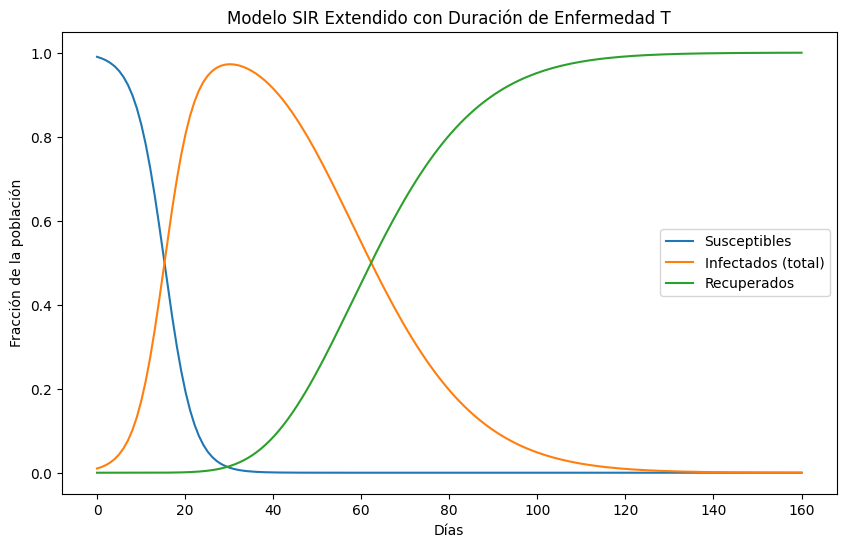

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
re = 3         # numero de encuentros por día
ri = 0.1       # tasas de infección
T = 7          # duración de la enfermedad en días
beta = re*ri   # tasa de contacto por día
gamma = 1 / T  # tasa de recuperación

# Condiciones iniciales
s0 = 0.99  # fracción inicial de susceptibles
x0 = [0.01] + [0] * (T - 1)  # fracción inicial de infectados en cada día de infección (solo en x_1 hay infectados inicialmente)
r0 = 0     # fracción inicial de recuperados

# Vector inicial de estado
initial_conditions = [s0] + x0 + [r0]


# Sistema de ecuaciones diferenciales
def model(y, t, beta, gamma, T):
    s = y[0]  # susceptibles
    x = y[1:T+1]  # infectados en cada día de la enfermedad
    r = y[T+1]  # recuperados

    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T  # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T  # Transición entre días de infección
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]  # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales
solution = odeint(model, initial_conditions, t, args=(beta, gamma, T))
s = solution[:, 0]
x = solution[:, 1:T+1]
r = solution[:, T+1]

# Gráfica de resultados
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Susceptibles')
plt.plot(t, np.sum(x, axis=1), label='Infectados (total)')
#for d in range(T):
    #plt.plot(t, x[:, d], label=f'Infectados día {d+1}')
plt.plot(t, r, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Modelo SIR Extendido con Duración de Enfermedad T')
plt.show()


#### Diferencia entre el modelo con "X" agregado y desagregado:

Progresión de la Enfermedad: En el modelo desagregado, la progresión de la enfermedad se modela explícitamente, lo que permite una mayor acumulación de infectados en diferentes etapas de la enfermedad. Esto puede resultar en un mayor número total de infectados en cualquier momento dado.

Tasa de Recuperación: En el modelo agregado, la tasa de recuperación se aplica uniformemente a todos los infectados, lo que puede llevar a una recuperación más rápida y, por lo tanto, a una menor fracción de infectados en cualquier momento dado.

Interacción entre Subgrupos: En el modelo desagregado, la interacción entre diferentes subgrupos de infectados puede llevar a una mayor transmisión de la enfermedad, ya que los infectados en diferentes etapas pueden tener diferentes tasas de transmisión.

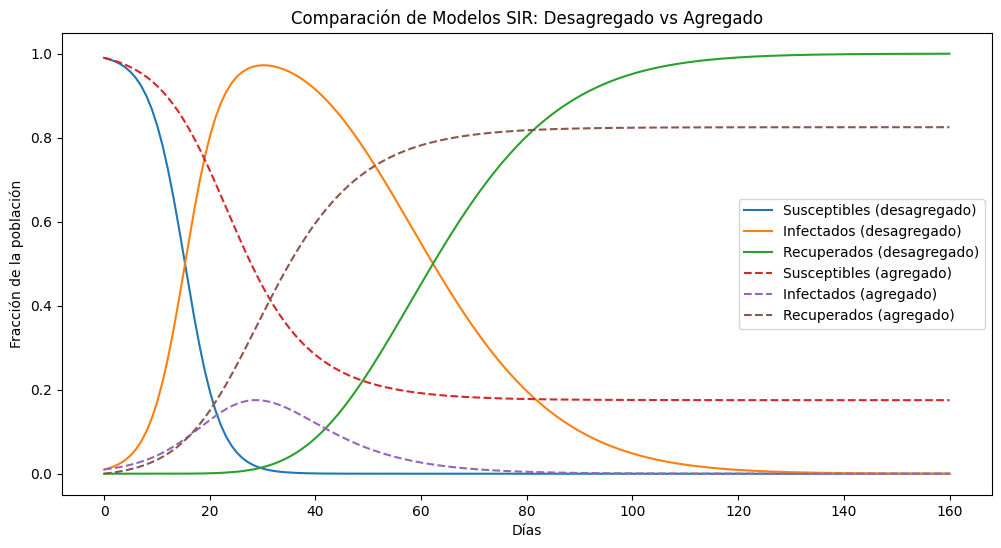

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
re = 3         # numero de encuentros por día
ri = 0.1       # tasas de infección
beta = re * ri # tasa de contacto por día
T = 7          # duración de la enfermedad en días
gamma = 1 / T  # tasa de recuperación

# Condiciones iniciales
s0 = 0.99  # fracción inicial de susceptibles
x0 = [0.01] + [0] * (T - 1)  # fracción inicial de infectados en cada día de infección (solo en x_1 hay infectados inicialmente)
r0 = 0     # fracción inicial de recuperados

# Vector inicial de estado para el modelo desagregado
initial_conditions_desagregado = [s0] + x0 + [r0]

# Sistema de ecuaciones diferenciales para el modelo desagregado
def model_desagregado(y, t, beta, gamma, T):
    s = y[0]  # susceptibles
    x = y[1:T+1]  # infectados en cada día de la enfermedad
    r = y[T+1]  # recuperados

    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T  # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T  # Transición entre días de infección
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]  # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]

# Vector inicial de estado para el modelo agregado
initial_conditions_agregado = [s0, 0.01, r0]

# Sistema de ecuaciones diferenciales para el modelo agregado
def model_agregado(y, t, beta, gamma):
    s, i, r = y

    ds_dt = -beta * s * i
    di_dt = beta * s * i - gamma * i
    dr_dt = gamma * i

    return [ds_dt, di_dt, dr_dt]

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales para el modelo desagregado
solution_desagregado = odeint(model_desagregado, initial_conditions_desagregado, t, args=(beta, gamma, T))
s_desagregado = solution_desagregado[:, 0]
x_desagregado = solution_desagregado[:, 1:T+1]
r_desagregado = solution_desagregado[:, T+1]

# Resolución del sistema de ecuaciones diferenciales para el modelo agregado
solution_agregado = odeint(model_agregado, initial_conditions_agregado, t, args=(beta, gamma))
s_agregado = solution_agregado[:, 0]
i_agregado = solution_agregado[:, 1]
r_agregado = solution_agregado[:, 2]

# Gráfica de resultados
plt.figure(figsize=(12, 6))

# Modelo desagregado
plt.plot(t, s_desagregado, label='Susceptibles (desagregado)')
plt.plot(t, np.sum(x_desagregado, axis=1), label='Infectados (desagregado)')
plt.plot(t, r_desagregado, label='Recuperados (desagregado)')

# Modelo agregado
plt.plot(t, s_agregado, '--', label='Susceptibles (agregado)')
plt.plot(t, i_agregado, '--', label='Infectados (agregado)')
plt.plot(t, r_agregado, '--', label='Recuperados (agregado)')

plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Comparación de Modelos SIR: Desagregado vs Agregado')
plt.show()

### Apartado 2:

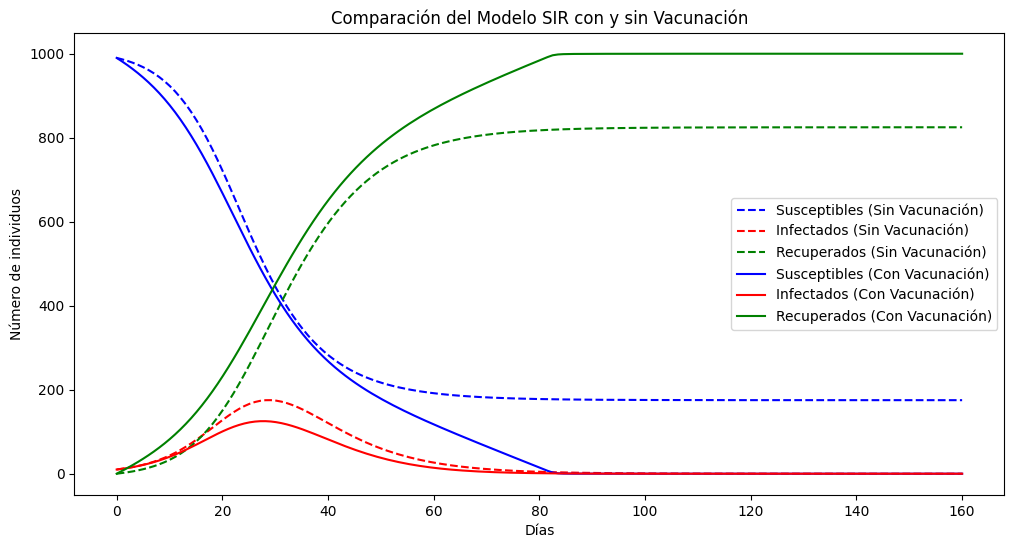

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día
T = 7           # duración de la enfermedad en días
gamma = 1 / T   # tasa de recuperación
p = 5           # número de personas vacunadas cada día

# Condiciones iniciales
S0 = N - 10     # susceptibles iniciales (la mayoría de la población)
X0 = 10         # infectados iniciales
R0 = 0          # recuperados iniciales

# --- Modelo SIR sin vacunación ---
def sir_model(y, t, beta, gamma, N):
    S, X, R = y
    dS_dt = -beta * S * X / N
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X
    return [dS_dt, dX_dt, dR_dt]

# --- Modelo SIR con vacunación ---
def sir_vacunacion_model(y, t, beta, gamma, N, p):
    S, X, R = y
    # Asegurarse de no vacunar más susceptibles de los que hay
    vacunados = min(S, p)
    dS_dt = -beta * S * X / N - vacunados
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X + vacunados
    return [dS_dt, dX_dt, dR_dt]

# Condiciones iniciales para ambos modelos
initial_conditions = [S0, X0, R0]

# Tiempo de simulación (en días)
days = 160
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales sin vacunación
solution_sin_vacunacion = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
S_sin_vacunacion, X_sin_vacunacion, R_sin_vacunacion = solution_sin_vacunacion.T

# Resolución del sistema de ecuaciones diferenciales con vacunación
solution_con_vacunacion = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p))
S_con_vacunacion, X_con_vacunacion, R_con_vacunacion = solution_con_vacunacion.T

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(t, S_sin_vacunacion, 'b--', label='Susceptibles (Sin Vacunación)')
plt.plot(t, X_sin_vacunacion, 'r--', label='Infectados (Sin Vacunación)')
plt.plot(t, R_sin_vacunacion, 'g--', label='Recuperados (Sin Vacunación)')

plt.plot(t, S_con_vacunacion, 'b', label='Susceptibles (Con Vacunación)')
plt.plot(t, X_con_vacunacion, 'r', label='Infectados (Con Vacunación)')
plt.plot(t, R_con_vacunacion, 'g', label='Recuperados (Con Vacunación)')

plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.title('Comparación del Modelo SIR con y sin Vacunación')
plt.show()


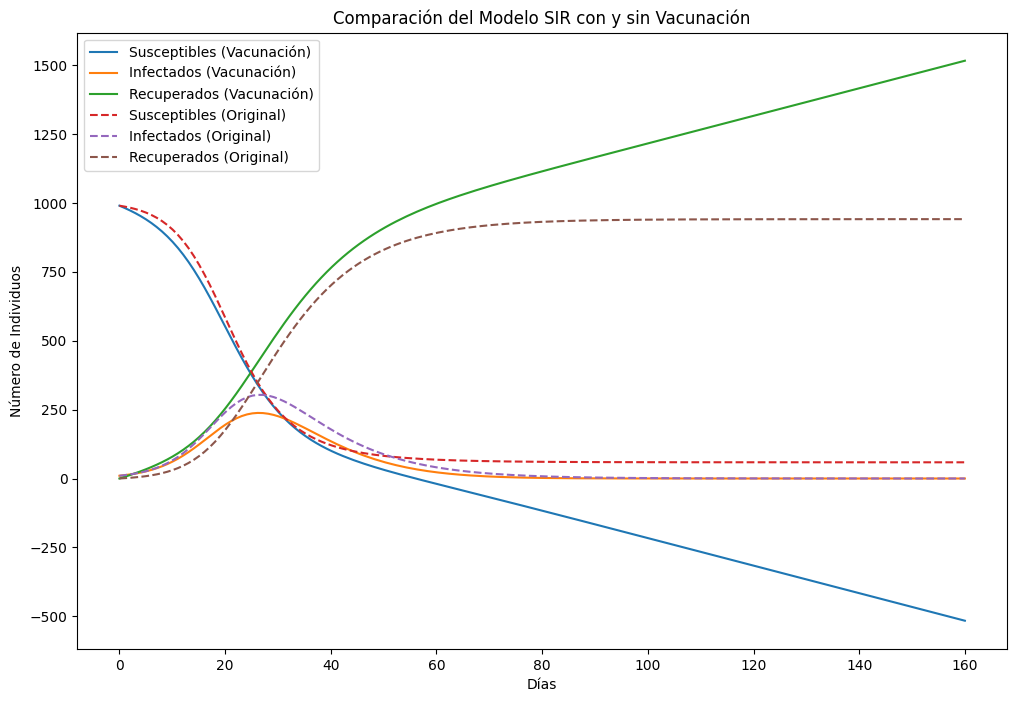

Número mínimo de vacunados p* para inmunidad de rebaño: 66.67


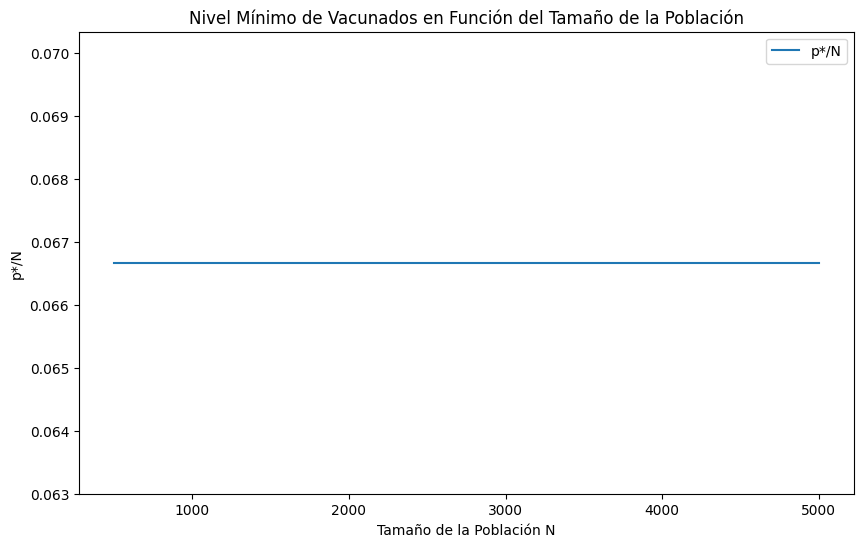

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir los parámetros del modelo
re = 3         # número de encuentros por día
ri = 0.1       # tasas de infección
beta = re * ri # tasa de contacto por día
gamma = 0.1    # tasa de recuperación
N = 1000       # tamaño de la población
p = 5          # número de personas vacunadas por día

# Función del modelo SIR con vacunación diaria
def model_sir_vacunacion(y, t, beta, gamma, N, p):
    S, I, R = y
    dSdt = -beta * S * I / N - p
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + p
    return [dSdt, dIdt, dRdt]

# Función del modelo SIR original
def model_sir_original(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Condiciones iniciales
S0 = 0.99 * N  # fracción inicial de susceptibles
I0 = 0.01 * N  # fracción inicial de infectados
R0 = 0         # fracción inicial de recuperados

# Tiempo de simulación
days = 160  # número de días a simular
t = np.linspace(0, days, days)

# Resolver el sistema de ecuaciones diferenciales para el modelo SIR con vacunación
initial_conditions_vacunacion = [S0, I0, R0]
solution_vacunacion = odeint(model_sir_vacunacion, initial_conditions_vacunacion, t, args=(beta, gamma, N, p))
S_vacunacion, I_vacunacion, R_vacunacion = solution_vacunacion.T

# Resolver el sistema de ecuaciones diferenciales para el modelo SIR original
initial_conditions_original = [S0, I0, R0]
solution_original = odeint(model_sir_original, initial_conditions_original, t, args=(beta, gamma))
S_original, I_original, R_original = solution_original.T

# Graficar los resultados
plt.figure(figsize=(12, 8))
plt.plot(t, S_vacunacion, label='Susceptibles (Vacunación)')
plt.plot(t, I_vacunacion, label='Infectados (Vacunación)')
plt.plot(t, R_vacunacion, label='Recuperados (Vacunación)')
plt.plot(t, S_original, '--', label='Susceptibles (Original)')
plt.plot(t, I_original, '--', label='Infectados (Original)')
plt.plot(t, R_original, '--', label='Recuperados (Original)')
plt.xlabel('Días')
plt.ylabel('Número de Individuos')
plt.legend()
plt.title('Comparación del Modelo SIR con y sin Vacunación')
plt.show()

# Encontrar el número mínimo de vacunados p* para inmunidad de rebaño
def encontrar_p_estrella(beta, gamma, N):
    R0 = beta / gamma
    p_estrella = (1 - 1/R0) * N * gamma
    return p_estrella

p_estrella = encontrar_p_estrella(beta, gamma, N)
print(f'Número mínimo de vacunados p* para inmunidad de rebaño: {p_estrella:.2f}')

# Estudiar el nivel mínimo de vacunados en función del tamaño de la población N
Ns = np.linspace(500, 5000, 10)
p_estrella_N = [encontrar_p_estrella(beta, gamma, N) for N in Ns]

# Graficar p*/N en función de N
plt.figure(figsize=(10, 6))
plt.plot(Ns, p_estrella_N / Ns, label='p*/N')
plt.xlabel('Tamaño de la Población N')
plt.ylabel('p*/N')
plt.title('Nivel Mínimo de Vacunados en Función del Tamaño de la Población')
plt.legend()
plt.show()

## Ejercicio 2

Trabajaremos en este ejercicio con extensiones del modelo de Leslie. Supongamos que tenemos una población de peces salvajes dividida en tres grupos de edad de un año cada una y cuya matriz de Leslie es la siguiente: 
$$L=\left[ \begin{array}{lll} 0 & 2 & 3 \\ 1/3 &  0 &  0\\ 0 & 1/2 & 0 \end{array}\right].$$
Parte de la población se cosecha anualmente con fines comerciales. Supóngase que se puede seleccionar el grupo de edad que se extrae a través de la tecnología pesquera. Se nota $d_i$ la tasa de extracción anual de la población de hembras en cada año para el grupo de edad $i$, $i=1,2,3$. 

**Apartado 1**. (a) Escribir la ecuación en diferencias que determinaría la evolución de los individuos con esas tasas de extracción individualizadas por grupos de edad. Utilizar para ello notación matricial; (b) Estudiar la proporción de la población a largo plazo si no existiera cosecha alguna e indicar qué tipo de crecimiento describe (expansivo, estable o en extinción); (c) Estudiar la evolución y proporción de la población a largo plazo si se extrae a largo plazo el 50% de la población del grupo 1, 2 y 3, respectivamente. 

**Apartado 2**. Se entiende por *extracción sostenible* aquella que mantiene la población estable a largo plazo. (a) Encontrar numericamente (computacionalmente) la extracción máxima sostenible si solo se permite extraer un porcentaje idéntico de los grupos de edad 2 y 3, esto es, $d_1=0$, $d_2=d_3$; (b) Lo mismo cuando solo se permite extraer un porcentaje de la población 3, esto es, $d_1=d_2=0$; (b) Encontrar esa tasa de extracción analíticamente. 

Opcional (lo comentó en clase): Cual seria mas rentable economicamente. Habria que añadir precios diferentes de mercado para cada grupo de edad.

## Apartado 1

Evolución de la población con extracción:
       Grupo 1    Grupo 2    Grupo 3
0   100.000000  50.000000  30.000000
1   140.000000   8.333333  10.000000
2     0.000000  42.500000   0.000000
3    85.000000   0.000000  21.250000
4    21.250000  28.333333   0.000000
5    46.041667   0.000000  14.166667
6    19.479167  15.347222   0.000000
7    20.954861   0.000000   7.673611
8    12.543403   6.984954   0.000000
9     7.698206   0.688657   3.492477
10    8.005642   2.221740   0.000000
11    0.440659   1.557677   1.110870
12    6.227636   0.000000   0.223404
13    0.000000   2.075879   0.000000
14    4.151757   0.000000   1.037939
15    1.037939   1.383919   0.000000
16    2.248868   0.000000   0.691960
17    0.951444   0.749623   0.000000
18    1.023523   0.000000   0.374811
19    0.612672   0.341174   0.000000
20    0.376013   0.033637   0.170587

Proporción estable sin extracción (Apartado 1(b)):
[0.68516335 0.21429796 0.10053869]
Tipo de crecimiento a largo plazo sin extracción: Expansi

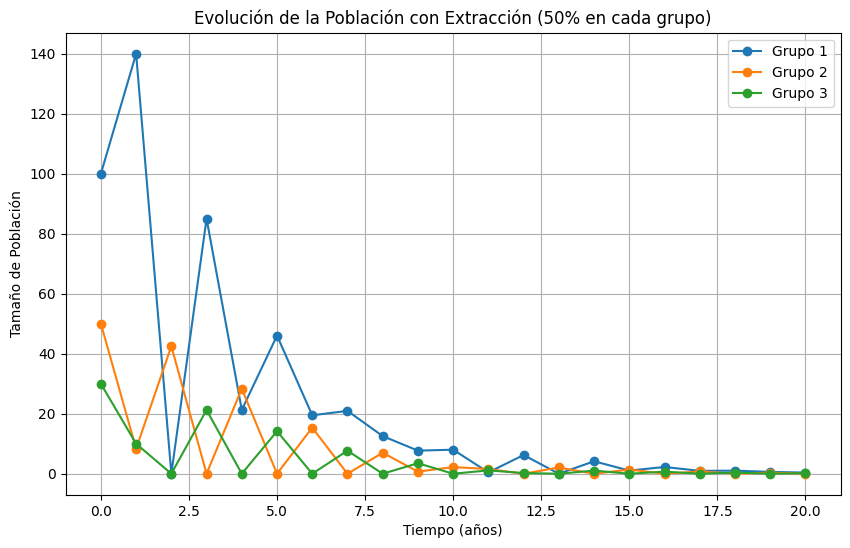

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la matriz de Leslie
L = np.array([
    [0, 2, 3],
    [1/3, 0, 0],
    [0, 1/2, 0]
])

# Definir el vector inicial de la población para cada grupo de edad
N0 = np.array([100, 50, 30])  

# Definir las tasas de extracción para cada grupo (apartado 1(c): extracción del 50%)
d1, d2, d3 = 0.5, 0.5, 0.5
D = np.diag([d1, d2, d3])

# Función para calcular la evolución de la población
def evolucion_poblacion(L, D, N0, t_max=20):
    poblacion = [N0]
    for _ in range(t_max):
        N_t = poblacion[-1]
        N_next = np.maximum((L - D) @ N_t, 0) # Ecuación en diferencias
        poblacion.append(N_next)
    return np.array(poblacion)

# Evolución de la población bajo extracción
evolucion_con_extraccion = evolucion_poblacion(L, D, N0)

# Análisis de proporción a largo plazo sin extracción
valores_propios, vectores_propios = np.linalg.eig(L)
indice_valor_propio_mayor = np.argmax(np.abs(valores_propios))
proporcion_estable = vectores_propios[:, indice_valor_propio_mayor]
proporcion_estable_normalizada = proporcion_estable / np.sum(proporcion_estable)

# Mostrar los resultados en tabla
df_resultados = pd.DataFrame(evolucion_con_extraccion, columns=["Grupo 1", "Grupo 2", "Grupo 3"])
print("Evolución de la población con extracción:")
print(df_resultados)

# Resultados del apartado 1(b)
print("\nProporción estable sin extracción (Apartado 1(b)):")
print(proporcion_estable_normalizada.real)

crecimiento_largo_plazo = "Expansivo" if valores_propios[indice_valor_propio_mayor] > 1 else "Estable" if valores_propios[indice_valor_propio_mayor] == 1 else "Extinción"
print(f"Tipo de crecimiento a largo plazo sin extracción: {crecimiento_largo_plazo}")

# Gráfico de evolución de la población con extracción
t = np.arange(len(evolucion_con_extraccion))

plt.figure(figsize=(10, 6))
plt.plot(t, evolucion_con_extraccion[:, 0], label='Grupo 1', marker='o')
plt.plot(t, evolucion_con_extraccion[:, 1], label='Grupo 2', marker='o')
plt.plot(t, evolucion_con_extraccion[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción (50% en cada grupo)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()


El código simula la evolución de una población dividida en grupos de edad mediante una función llamada evolucion_poblacion, que utiliza una matriz de Leslie L para las tasas de fecundidad y supervivencia y una matriz de extracción D para reducir la población en cada grupo. La función itera a lo largo de los años, calculando la población en cada paso mediante 

$$Nnext =(L−D)⋅Nt$$
​
Donde (L - D) ajusta las tasas de crecimiento considerando la extracción. El resultado es un historial de la población de cada grupo a lo largo del tiempo, permitiendo analizar el impacto de la extracción en la dinámica poblacional.